In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import torch.nn.functional as F

In [2]:
torch.cuda.set_device(0)
device = torch.device("cuda")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/ssn3/train.zip -d /content/data

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: /content/data/train/monkey/n02488702_1549.JPEG  
  inflating: /content/data/train/monkey/n02484473_925.JPEG  
  inflating: /content/data/train/monkey/n02484473_1980.JPEG  
  inflating: /content/data/train/monkey/n02488894_658.JPEG  
  inflating: /content/data/train/monkey/n02484473_2389.JPEG  
  inflating: /content/data/train/monkey/n02484473_1320.JPEG  
  inflating: /content/data/train/monkey/n02484473_1446.JPEG  
  inflating: /content/data/train/monkey/n02484473_1426.JPEG  
  inflating: /content/data/train/monkey/n02488702_72.JPEG  
  inflating: /content/data/train/monkey/n02488702_2650.JPEG  
  inflating: /content/data/train/monkey/n02488702_4894.JPEG  
  inflating: /content/data/train/monkey/n02488702_1992.JPEG  
  inflating: /content/data/train/monkey/n02488702_4695.JPEG  
  inflating: /content/data/train/monkey/n02484473_1574.JPEG  
  inflating: /content/data/train/monkey/n02488702_3344.JPEG  
  inflati

In [4]:
train_transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(p=0.5),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [5]:
trainset = torchvision.datasets.ImageFolder("data/train/", transform=train_transform)

In [6]:
torch.manual_seed(288)
A = int(len(trainset)*0.75)
B = len(trainset) - int(len(trainset)*0.75)
lengths = [A, B]
print(len(trainset))
print(lengths)
train_set, test_set = torch.utils.data.random_split(trainset, lengths)

88011
[66008, 22003]


In [7]:
def make_weights_for_balanced_classes(images, nclasses):                        
    count = [0] * nclasses                                                      
    for item in images:
                                                         
        count[item[1]] += 1                                                     
    weight_per_class = [0.] * nclasses  
    print(count)                                    
    N = float(sum(count))                                                   
    for i in range(nclasses):                                                   
        weight_per_class[i] = N/float(count[i])                                 
    weight = [0] * len(images)                                              
    for idx, val in enumerate(images):                                          
        weight[idx] = weight_per_class[val[1]]                                  
    return weight  

In [8]:
weights_test = make_weights_for_balanced_classes(test_set, len(trainset.classes))
print(weights_test)                                                              
weights_test = torch.DoubleTensor(weights_test)   
print(weights_test)                                     
sampler_test = torch.utils.data.sampler.WeightedRandomSampler(weights_test, len(weights_test))  
print(sampler_test.weights)                    
                                                                                
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle = False,                              
                                                             sampler = sampler_test,  pin_memory=True)  


[464, 445, 452, 489, 462, 458, 448, 454, 460, 473, 253, 462, 444, 118, 445, 445, 417, 431, 448, 465, 468, 468, 488, 425, 445, 462, 423, 442, 457, 467, 448, 426, 434, 460, 446, 425, 433, 452, 451, 487, 438, 449, 449, 450, 430, 442, 496, 427, 458, 424]
[47.42025862068966, 186.46610169491527, 49.44494382022472, 49.556306306306304, 48.787139689578716, 47.625541125541126, 44.36088709677419, 45.18069815195072, 51.8938679245283, 50.69815668202765, 47.832608695652176, 49.44494382022472, 47.625541125541126, 47.625541125541126, 51.52927400468384, 49.00445434298441, 49.78054298642534, 47.625541125541126, 46.51797040169133, 48.04148471615721, 50.2351598173516, 48.89555555555555, 48.4647577092511, 48.04148471615721, 51.52927400468384, 47.01495726495727, 48.04148471615721, 50.69815668202765, 49.113839285714285, 48.14660831509847, 50.2351598173516, 47.01495726495727, 51.8938679245283, 50.2351598173516, 47.832608695652176, 52.76498800959233, 52.016548463356976, 47.625541125541126, 48.89555555555555, 1

In [9]:
weights_train = make_weights_for_balanced_classes(train_set, len(trainset.classes))
print(weights_train)                                                              
weights_train = torch.DoubleTensor(weights_train)   
print(weights_train)                                     
sampler_train = torch.utils.data.sampler.WeightedRandomSampler(weights_train, len(weights_train))  
print(sampler_train.weights)                    
                                                                                
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, sampler = sampler_train)  

[1336, 1355, 1348, 1311, 1338, 1342, 1352, 1346, 1340, 1327, 855, 1338, 1356, 385, 1355, 1355, 1383, 1369, 1352, 1335, 1332, 1332, 1312, 1375, 1355, 1338, 1377, 1358, 1343, 1333, 1352, 1374, 1366, 1340, 1354, 1375, 1367, 1348, 1349, 1313, 1362, 1351, 1351, 1350, 1370, 1358, 1304, 1373, 1342, 1376]
[48.967359050445104, 49.333333333333336, 48.040756914119356, 49.14966492926285, 48.040756914119356, 48.967359050445104, 48.32210834553441, 49.44419475655431, 49.18628912071535, 49.742275810097965, 48.67846607669617, 48.040756914119356, 48.21621621621622, 48.71439114391144, 49.25970149253731, 48.18102189781022, 49.18628912071535, 47.97093023255814, 49.55555555555556, 48.85862324204293, 49.25970149253731, 48.21621621621622, 49.14966492926285, 47.9360929557008, 48.82248520710059, 50.3109756097561, 48.67846607669617, 47.728127259580624, 48.71439114391144, 49.40718562874252, 48.82248520710059, 50.34935163996949, 48.71439114391144, 48.18102189781022, 48.040756914119356, 49.40718562874252, 48.714391

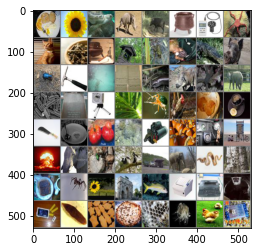

In [10]:
import matplotlib.pyplot as plt
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))


In [11]:
def get_accuracy(model, data):
    correct = 0
    total = 0
    model.eval() #*********#
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
        imgs, labels = imgs.to(device), labels.to(device)
        output = model(imgs)
        pred = output.max(1, keepdim=True)[1] # get the index of the max logit
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ## Warstwa konwolucyjna
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64) 
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64,kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64,kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128,kernel_size=3, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=128,kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=256,kernel_size=3, stride=2, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=256,kernel_size=3, stride=1, padding=1)
        self.bn7 = nn.BatchNorm2d(256)
        self.conv8 = nn.Conv2d(in_channels=256, out_channels=512,kernel_size=3, stride=2, padding=1)
        self.bn8 = nn.BatchNorm2d(512)
        self.conv9 = nn.Conv2d(in_channels=512, out_channels=512,kernel_size=3, stride=1, padding=1)
        self.bn9 = nn.BatchNorm2d(512)

        self.pool = nn.AvgPool2d(4)
        self.fc = nn.Linear(512*2*2, 50)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = F.relu(self.bn7(self.conv7(x)))
        x = F.relu(self.bn8(self.conv8(x)))
        x = F.relu(self.bn9(self.conv9(x)))

        x = self.pool(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc(x)
        return x


net = Net().to(device)
net

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [13]:
len(train_set)

66008

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import torch.optim as optim
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
 


loss_mean = []
for epoch in range(15):  # loop over the dataset multiple times
    epoch_losses = []
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        l_item = loss.item()
        epoch_losses.append(l_item)
        optimizer.step()
        # zero the parameter gradients
        optimizer.zero_grad()

        # print statistics
        running_loss += l_item

    print('[%d/15]' %  (epoch+1))
    
    loss_mean = np.array(epoch_losses).mean()
    test_acc = get_accuracy(net, test_set)
    print(f"Epoch {epoch} loss {loss_mean:.3} test_acc: {test_acc:.3}")


    running_loss = 0.0

print('Finished Training')


[1/15]
Epoch 0 loss 3.38 test_acc: 0.2
[2/15]
Epoch 1 loss 2.97 test_acc: 0.247
[3/15]
Epoch 2 loss 2.7 test_acc: 0.28
[4/15]
Epoch 3 loss 2.5 test_acc: 0.321
[5/15]
Epoch 4 loss 2.32 test_acc: 0.365
[6/15]
Epoch 5 loss 2.17 test_acc: 0.397
[7/15]
Epoch 6 loss 2.05 test_acc: 0.407
[8/15]
Epoch 7 loss 1.91 test_acc: 0.434
[9/15]
Epoch 8 loss 1.8 test_acc: 0.454
[10/15]
Epoch 9 loss 1.68 test_acc: 0.457
[11/15]
Epoch 10 loss 1.59 test_acc: 0.467
[12/15]
Epoch 11 loss 1.47 test_acc: 0.473
[13/15]
Epoch 12 loss 1.37 test_acc: 0.478
[14/15]
Epoch 13 loss 1.27 test_acc: 0.466
[15/15]
Epoch 14 loss 1.18 test_acc: 0.481
Finished Training


In [16]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data    
        images = images.to(device)
        outputs = net(images).cpu()   
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

  
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))

Accuracy for class acoustic is: 41.4 %
Accuracy for class antenna is: 48.7 %
Accuracy for class bacteria is: 43.9 %
Accuracy for class battery is: 47.7 %
Accuracy for class bean  is: 28.6 %
Accuracy for class beetle is: 56.6 %
Accuracy for class bicycle is: 63.4 %
Accuracy for class birch is: 35.2 %
Accuracy for class bird  is: 23.7 %
Accuracy for class bomb  is: 45.7 %
Accuracy for class bread is: 40.4 %
Accuracy for class bridge is: 55.7 %
Accuracy for class camera is: 54.1 %
Accuracy for class carbon is: 41.2 %
Accuracy for class cat   is: 42.2 %
Accuracy for class corn  is: 38.3 %
Accuracy for class crab  is: 34.1 %
Accuracy for class crocodilian is: 39.8 %
Accuracy for class echinoderm is: 41.8 %
Accuracy for class egg   is: 42.3 %
Accuracy for class elephant is: 56.4 %
Accuracy for class fish  is: 50.7 %
Accuracy for class flower is: 90.9 %
Accuracy for class frog  is: 35.8 %
Accuracy for class fungus is: 64.5 %
Accuracy for class gauge is: 40.7 %
Accuracy for class hammer is: 73

In [18]:
!unzip /content/drive/MyDrive/ssn3/test_all.zip -d /content/data/test

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: /content/data/test/test_all/48404765780136605.JPEG  
  inflating: /content/data/test/test_all/5623874037695173.JPEG  
  inflating: /content/data/test/test_all/8830923257791682.JPEG  
  inflating: /content/data/test/test_all/5999784560329912.JPEG  
  inflating: /content/data/test/test_all/641941689724576.JPEG  
  inflating: /content/data/test/test_all/9636463870285614.JPEG  
  inflating: /content/data/test/test_all/713318944677822.JPEG  
  inflating: /content/data/test/test_all/4913615325728824.JPEG  
  inflating: /content/data/test/test_all/008735498505776818.JPEG  
  inflating: /content/data/test/test_all/3814762033873971.JPEG  
  inflating: /content/data/test/test_all/23028839087812902.JPEG  
  inflating: /content/data/test/test_all/8989128654123999.JPEG  
  inflating: /content/data/test/test_all/6757518822057905.JPEG  
  inflating: /content/data/test/test_all/725959409539307.JPEG  
  inflating: /content/da

In [19]:
test_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [20]:
image = torchvision.datasets.ImageFolder("data/test", transform=test_transform)

In [21]:
import os
def get_pred(model, data):
    model.eval()
    f = open("results.csv", "w")
    pred = []
    test_all_data = torch.utils.data.DataLoader(data, batch_size=1)
    for i, data in enumerate(test_all_data, 0):
        imgs, labels = data
        imgs = imgs.to(device)
        output = model(imgs)
        p = output.max(1, keepdim=True)[1] # get the index of the max logit
        i_path, _ = test_all_data.dataset.samples[i]
        f.write("{}, {}\n".format(os.path.basename(i_path), p.item()))
    f.close()
get_pred(net, image)